# Testing Notebook
### This is the notebook to test our trained model

## Loading the Model

In [1]:
from tensorflow.keras.models import model_from_json

In [2]:
def load_model():
    json_file = open("model.json" , "r")
    loaded_model_json = json_file.read()

    json_file.close()

    model = model_from_json(loaded_model_json)

    model.load_weights("model.h5")
    return model

In [3]:
model = load_model()

## Describing the emotion dictionary

In [4]:
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Sad", 5: "Surprised", 6: "Neutral"}
emojis = { 0:"\U0001f620",1:"\U0001f922" ,2:"\U0001f628" ,3:"\U0001f60A" , 4:"\U0001f625" ,5:"\U0001f632",6:"\U0001f610" }

In [5]:
print(emojis.values())

dict_values(['😠', '🤢', '😨', '😊', '😥', '😲', '😐'])


## Importing Libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

## Describing a function to Predict the result for an image provided

In [23]:
def predict(path):
    facecasc = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    imagePath = path
    image = cv2.imread(imagePath)
    print_im = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=10)
    print("No of faces : ",len(faces))
    i = 1
    for (x, y, w, h) in faces:
        
        # cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.rectangle(print_im, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
        
        roi_gray = gray[y:y + h, x:x + w]                      
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
        prediction = model.predict(cropped_img)

        maxindex = int(np.argmax(prediction))
        print("person ",i," : ",emotion_dict[maxindex], "-->",emojis[maxindex])
        
        
        # cv2.putText(image, emotion_dict[maxindex], (x+10, y-20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)  
        cv2.putText(print_im, emotion_dict[maxindex], (x+10, y-20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)  
        
        i=i+1
  
    #cv2.imshow("Test Image",image)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()
    
    plt.imshow(print_im)
    plt.show()

No of faces :  3
person  1  :  Neutral --> 😐
person  2  :  Happy --> 😊
person  3  :  Disgusted --> 🤢


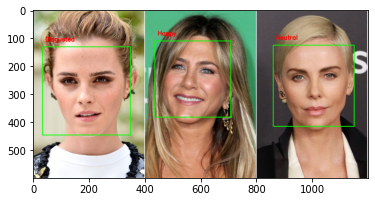

In [31]:
predict('Test_images/ladies.jpeg')

No of faces :  1
person  1  :  Neutral --> 😐


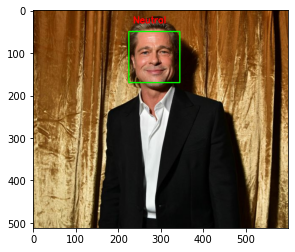

In [32]:
predict('Test_images/brad.jpg')

No of faces :  2
person  1  :  Neutral --> 😐
person  2  :  Neutral --> 😐


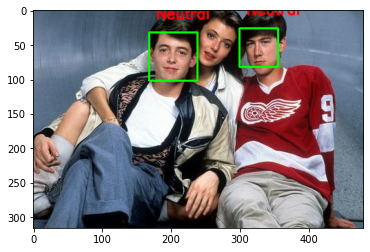

In [33]:
predict('Test_images/people.jpg')

No of faces :  1
person  1  :  Angry --> 😠


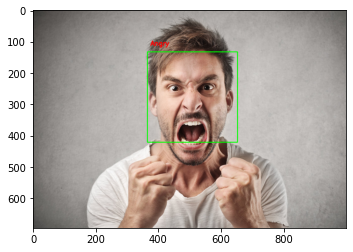

In [34]:
predict('Test_images/angry_test.jpeg')

No of faces :  1
person  1  :  Happy --> 😊


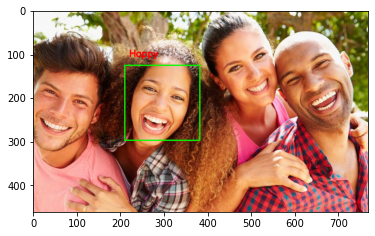

In [36]:
predict('Test_images/trial_im_0.jpg')

No of faces :  2
person  1  :  Neutral --> 😐
person  2  :  Neutral --> 😐


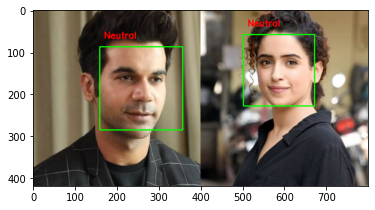

In [37]:
predict('Test_images/trial_im_1.jpg')

No of faces :  1
person  1  :  Angry --> 😠


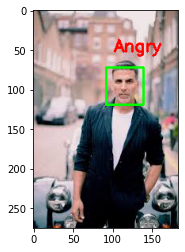

In [39]:
predict('Test_images/trial_im_4.jpeg')